# Random Forest and Gradient Boosting

## Random Forest Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

dataset = pd.read_csv('datasets/Social_Network_Ads.csv')

In [2]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:, [2,3]].values.astype("float32")
y = dataset.iloc[:, 4].values

In [4]:
# dataset 을 Training 과 Test set 으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [5]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [6]:
# Training set 에 대해 Random Forest Classifier model 을 fitting
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [7]:
y_pred = rf.predict(X_test)

print(y_pred)
print()
print("Test set true counts = ", sum(y_test))
print("predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1]

Test set true counts =  22
predicted true counts =  23
accuracy = 0.91


In [8]:
# making confusion matrix
print("confution matrix\n", confusion_matrix(y_test, y_pred, labels=[1, 0]))
print()
print("f1 score\n", f1_score(y_test, y_pred, labels=[1, 0]))

confution matrix
 [[19  3]
 [ 4 54]]

f1 score
 0.8444444444444444


## Gradient Boosting Classifier

- min_samples_split : node 분리에 필요한 최소 sample 수 => overfitting 방지  
- max_depth : tree 깊이 조절 => overfitting 방지
- learning_rate : 각 tree 의 기여도 조정, n_estimators 와 trade-off 
- n_estimators : number of sequential trees

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=500, max_depth=5)
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=500)

In [10]:
y_pred = gb.predict(X_test)

print(y_pred)
print()
print("Test set true counts = ", sum(y_test))
print("predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 1]

Test set true counts =  22
predicted true counts =  22
accuracy = 0.93


In [61]:
# making confusion matrix
print("confution matrix\n", confusion_matrix(y_test, y_pred, labels=[1, 0]))
print()
print("f1 score\n", f1_score(y_test, y_pred, labels=[1, 0]))

confution matrix
 [[19  3]
 [ 3 55]]

f1 score
 0.8636363636363636


## Visualization of the Training result

In [62]:
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])   
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])    

In [63]:
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1       
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1  

X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
XX = np.column_stack([X1.ravel(), X2.ravel()])
Y_rf = np.array(rf.predict(XX))
Y_gb = np.array(gb.predict(XX))

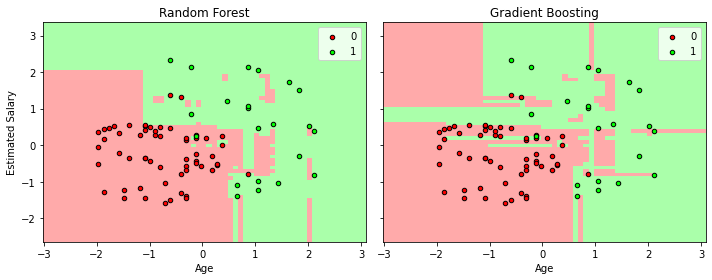

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Random Forest
ax1.pcolormesh(X1, X2, Y_rf.reshape(X1.shape), cmap=cmap_light, shading='auto') 
for i in range(2):
    ax1.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], s=20, 
                    color=cmap_bold(i), label=i, edgecolor='k')
ax1.set_title('Random Forest')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax1.legend()
# Gradient Boosting
ax2.pcolormesh(X1, X2, Y_gb.reshape(X1.shape), cmap=cmap_light, shading='auto') 
for i in range(2):
    ax2.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], s=20, 
                    color=cmap_bold(i), label=i, edgecolor='k')
ax2.set_title('Gradient Boosting')
ax2.set_xlabel('Age')
ax2.legend()
plt.tight_layout()

In [67]:
gb.feature_importances_       # Age, EstimatedSalary 의 중요도

array([0.49319031, 0.50680969])

In [68]:
feature_imp = pd.Series(gb.feature_importances_, ['Age', 'EstimatedSalary']).sort_values(ascending=False)
feature_imp

EstimatedSalary    0.50681
Age                0.49319
dtype: float64

<AxesSubplot:title={'center':'feature importance'}>

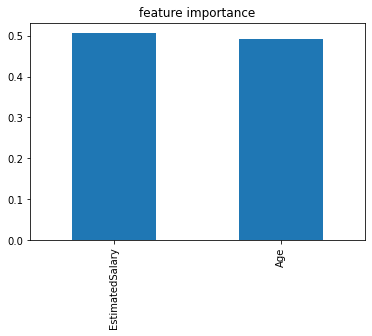

In [69]:
feature_imp.plot(kind='bar', title='feature importance')